# Работа с графами в NetworkX

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/tutorial.html#creating-a-graph
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html
    * https://networkx.org/documentation/stable/reference/classes/index.html
    * https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html

## Вопросы для совместного обсуждения

1\. Обсудите основные возможности по созданию графов и работы с графами в NetworkX

In [2]:
import networkx as nx

In [3]:
nx.__version__

'3.2.1'

In [4]:
G = nx.Graph()
G.add_node('A', age = 28)
G.add_nodes_from(['B','C'])
G.add_edge('A','B', h = 180)
G.add_edges_from([('A','C'),('B','C')])

In [5]:
G.nodes

NodeView(('A', 'B', 'C'))

In [6]:
G.nodes()

NodeView(('A', 'B', 'C'))

In [7]:
G.nodes(data=True)

NodeDataView({'A': {'age': 28}, 'B': {}, 'C': {}})

In [8]:
G.nodes(data='age')

NodeDataView({'A': 28, 'B': None, 'C': None}, data='age')

In [9]:
len(G) , len(G.nodes)

(3, 3)

In [10]:
G.edges

EdgeView([('A', 'B'), ('A', 'C'), ('B', 'C')])

In [11]:
G.edges(data=True)

EdgeDataView([('A', 'B', {'h': 180}), ('A', 'C', {}), ('B', 'C', {})])

In [12]:
G.nodes['A']


{'age': 28}

In [13]:
G['A']

AtlasView({'B': {'h': 180}, 'C': {}})

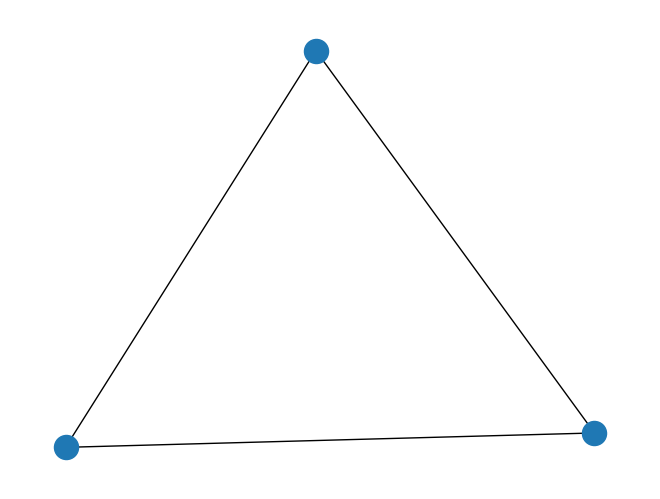

In [14]:
nx.draw(G)

In [15]:
H = nx.DiGraph()
H.add_node('A', age = 28)
H.add_nodes_from(['B','C'])



H.add_edge('A','B', h = 180)
H.add_edges_from([('A','C'),('B','C')])

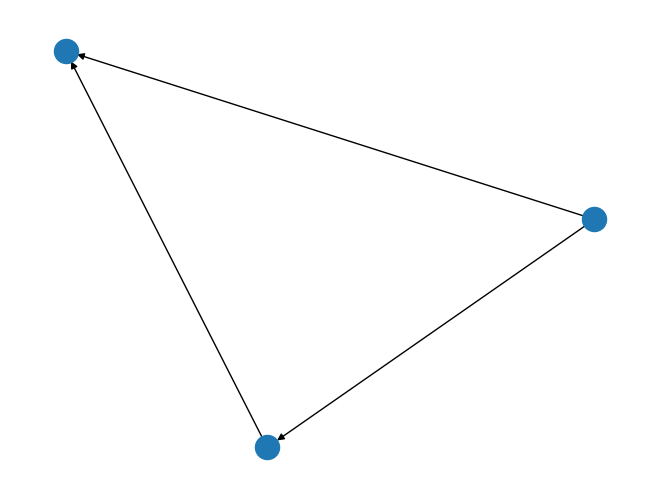

In [16]:
nx.draw(H)

In [17]:
H['B'] # на кого ссылается

AtlasView({'C': {}})

In [18]:
list(H.predecessors('B')) # кто ссылается на тебя

['A']

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Напишите функцию, генерирующую кольцевой неориентированный граф из `n` узлов (`n` - параметр функции). Идентификатором узла выступают целые числа от 0 до `n-1`. Каждому узлу добавьте атрибут `age`, заполненный случайными целыми числами от 1 до 100. Каждому ребру добавьте атрибут `mean_incident_age`, состоящий из среднего значения атрибута `age` у узлов, инцидентных данному ребру.

Создайте граф с `n=5` узлами. Выведите на экран словари, содержащие атрибут `age` для узлов (ключ - идентификатор узла) и `mean_incident_age` для ребер (ключ - пара `(u, v`) идентификаторов начала и конца ребра). Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию.

- [X] Проверено на семинаре

In [19]:
import random

In [20]:
# 0-1, 1-2, 2-3, 3-4, 4-5, 5-0

In [21]:
def ring_g(n):
    G = nx.Graph()

    for i in range(n):
        G.add_node(i, age = random.randint(1, 100))

    for i in range(n):
        G.add_edge(i, (i + 1)%n, mean_incident_age = (G.nodes[i]['age'] + G.nodes[(i + 1)%n]['age'])/2)

    return G

In [22]:
rg = ring_g(5)

In [23]:
d1 = {node: rg.nodes[node]['age'] for node in rg.nodes}
d1

{0: 17, 1: 31, 2: 7, 3: 16, 4: 99}

In [24]:
# rg.edges

In [25]:
d2 = edges_attributes = {(u, v): rg.edges[u, v]['mean_incident_age'] for u, v in rg.edges}
d2

{(0, 1): 24.0, (0, 4): 58.0, (1, 2): 19.0, (2, 3): 11.5, (3, 4): 57.5}

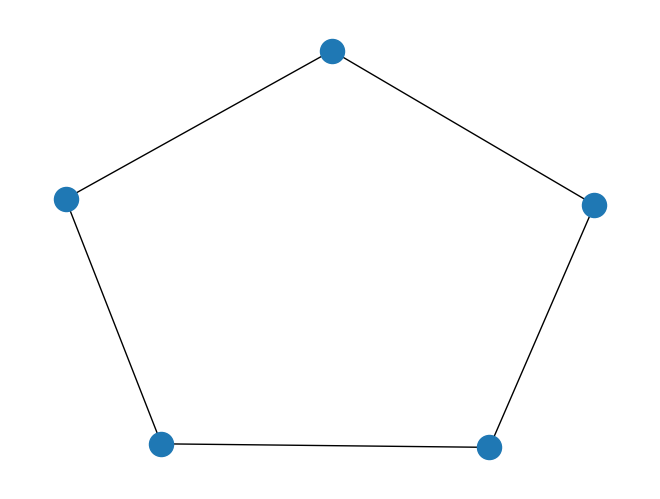

In [26]:
nx.draw(rg)

<p class="task" id="2"></p>

2\. Напишите функцию, генерирующую ориентированный граф из `3n + 1` узлов (`n` - параметр функции), где центральный узел соединен с тремя путями длины `n`. Ребра всегда направлены в сторону удаления от центрального узла.

Сгенерируйте граф для `n=3`. Выведите на экран количество узлов и ребер в графе. Для каждого узла выведите на экран список идентификаторов его соседей (отдельно по входящим и исходящим связям). Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию.

- [ ] Проверено на семинаре

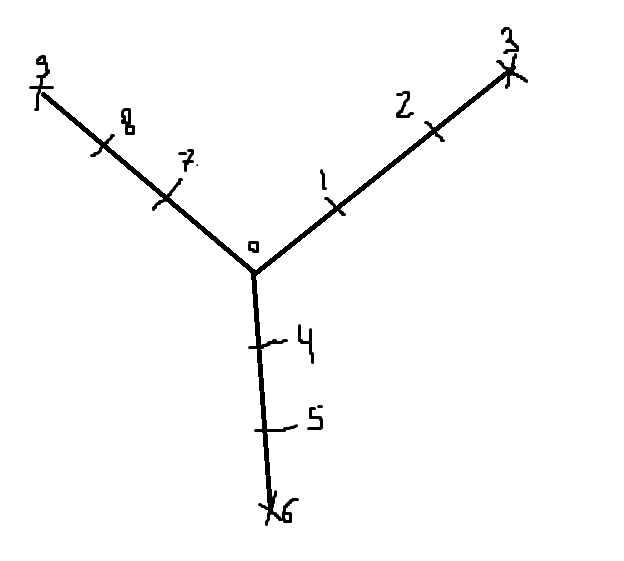

In [27]:
# 0 1 2 3 4 5 6 7 8 9 10
# n=3
# 0 - центр
# 1 ветвь - от 1 до 3 -> [1;n]
# 2 ветвь - от 4 до 6 -> [n+1,2n]
# 3 ветвь - от 7 до 9 -> [2*n+1,3n]

In [242]:
def di_g(n):

    G = nx.DiGraph()
    G.add_edges_from([(0, 1), (0, n+1), (0, 2*n+1)])

    for i in range(1, 3*n):
        if i % n != 0: #обрываем на концах
            G.add_edge(i, i+1)

    return G

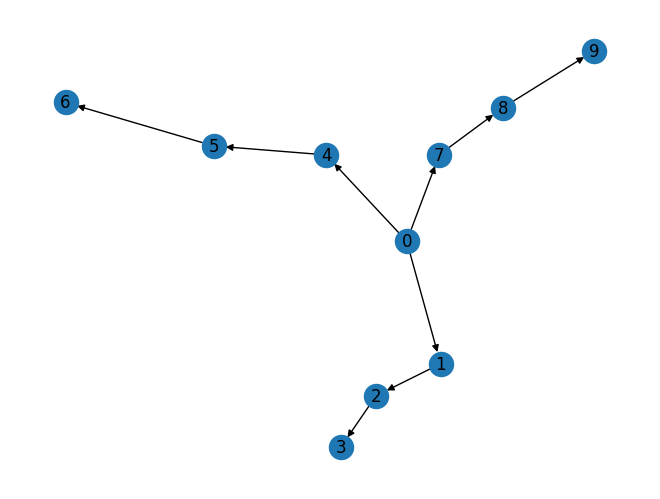

In [275]:
g = di_g(3)
nx.draw(g, with_labels=True)


In [250]:
len(g.nodes)

10

In [251]:
len(g.edges)

9

In [260]:
for node in g:
    to_node = list(g[node])  #куда
    from_node = list(g.predecessors(node))  # откуда
    print(f"Узел {node}:")
    print("Входящие связи:", from_node)
    print("Исходящие связи:", to_node)

Узел 0:
Входящие связи: []
Исходящие связи: [1, 4, 7]
Узел 1:
Входящие связи: [0]
Исходящие связи: [2]
Узел 4:
Входящие связи: [0]
Исходящие связи: [5]
Узел 7:
Входящие связи: [0]
Исходящие связи: [8]
Узел 2:
Входящие связи: [1]
Исходящие связи: [3]
Узел 3:
Входящие связи: [2]
Исходящие связи: []
Узел 5:
Входящие связи: [4]
Исходящие связи: [6]
Узел 6:
Входящие связи: [5]
Исходящие связи: []
Узел 8:
Входящие связи: [7]
Исходящие связи: [9]
Узел 9:
Входящие связи: [8]
Исходящие связи: []


<p class="task" id="3"></p>

3\. Напишите собственную функцию создания двумерной решетки `n` на `m`. В качестве идентификаторов узлов используйте пары `(x, y)`, где `x` - номер строки решетки, `y` - номер столбца решетки. Сохраните ширину и высоту решетки в виде атрибутов `n` и `m ` самого графа.

Сгенерируйте граф с n=5, m=4. Выведите на экран количество узлов и ребер в графе. Выведите созданные атрибуты графа на экран. Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте и визуализируйте аналогичный по структуре граф при помощи готовой функции из `networkx`.

- [ ] Проверено на семинаре

In [304]:
def grid_graph(n, m):
    G = nx.Graph()
    G.n = n
    G.m = m

    for x in range(n):
        for y in range(m):
            G.add_node((x, y))
            if x!=0:
                G.add_edge((x, y), (x-1, y))
            if y!=0:
                G.add_edge((x, y), (x, y-1))
    return G



In [305]:
grid_g = grid_graph(5, 4)

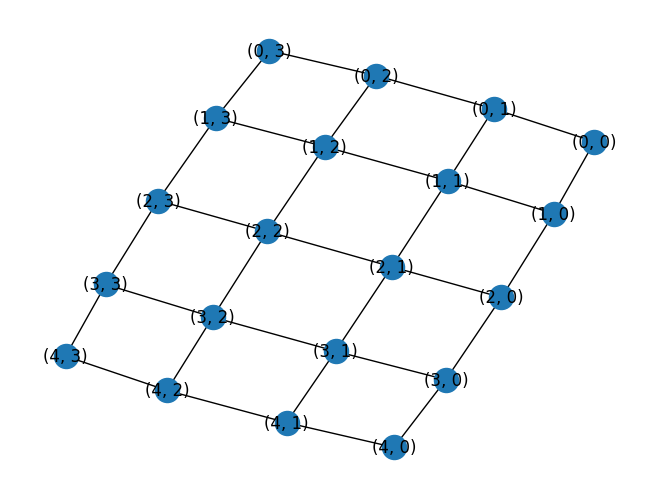

In [308]:
nx.draw(grid_g, with_labels=True)

In [158]:
len(grid_g.nodes)

20

In [159]:
len(grid_g.edges)

31

In [160]:
grid_g.n

5

In [162]:
grid_g.m

4

In [163]:
nx_gg= nx.grid_2d_graph(5, 4)

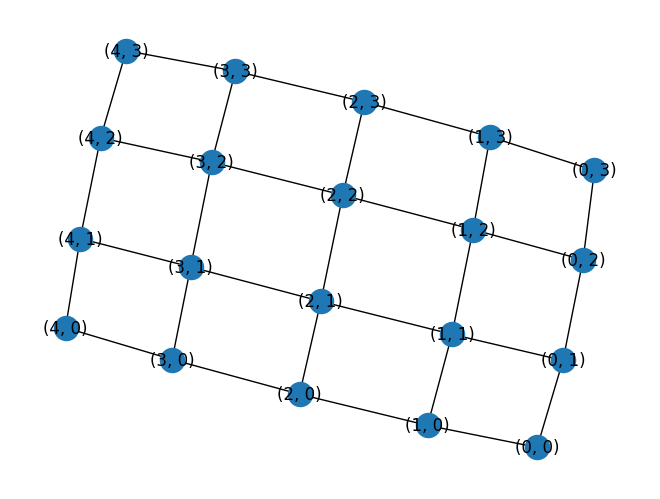

In [166]:
nx.draw(nx_gg, with_labels=True)

<p class="task" id="4"></p>

4\. Напишите функцию, которая генерирует мультиграф, состоящий из `m` узлов, где количество связей между узлами `u` и `v` сэмплится из биномиального распределения с параметрами `n` и `p` (`m`, `n`, `p` - параметры функции). Циклы в графе допускаются. На каждом ребре создайте атрибут `weight`, равный обратному значению количества ребер между индицентными ему узлами. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте версию графа с удаленными петлями и визуализуйте ее.

- [ ] Проверено на семинаре

In [170]:
import numpy as np

In [324]:
def gen_multigraph(m, n, p):
    G = nx.MultiGraph()

    for u in range(m):
        for v in range(m):
            n_edges = np.random.binomial(n, p)
            for i in range(n_edges):
                G.add_edge(u, v, weight=1/n_edges)
    return G

In [325]:
m = 5
n = 3
p = 0.5

In [326]:
multigraph = gen_multigraph(m, n, p)

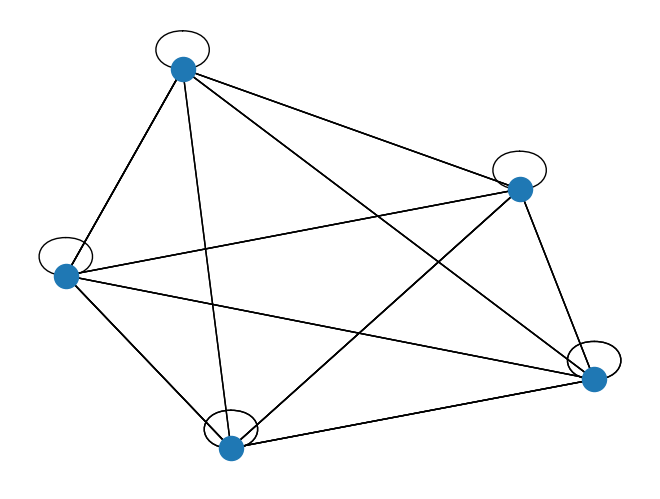

In [327]:
nx.draw(multigraph)

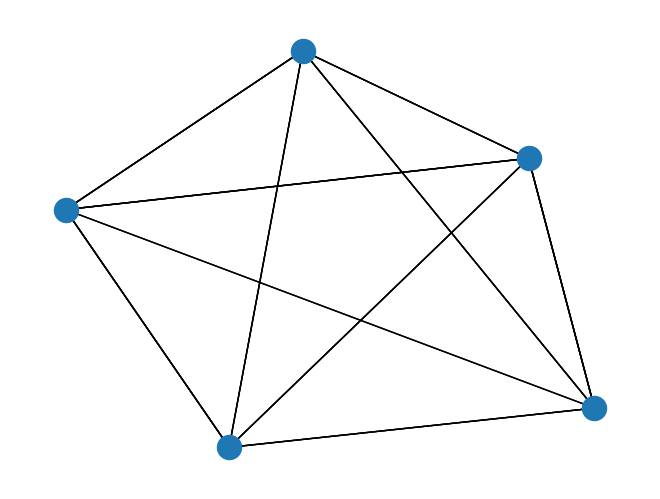

In [329]:
multigraph.remove_edges_from(nx.selfloop_edges(multigraph))
nx.draw(multigraph)

<p class="task" id="5"></p>

5\. Граф «(u,v) цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длиной u и v соответственно (см.рис). Реализуйте функцию построения (1, 2) цветка. Функция принимает один целочисленный параметр `n` - количество шагов построения. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию.

![](https://i.imgur.com/aJnbzxM.png)

- [ ] Проверено на семинаре

In [206]:
def flower(n):
    G = nx.Graph()

    G.add_edges_from([(0, 1), (1, 2), (2, 0)])

    k = 3
    for i in range(n-1):
        new_edges = []
        for edge in list(G.edges):
            new_edges.extend([(edge[0], k), (k, edge[1])])
            k += 1
        G.add_edges_from(new_edges)

    return G


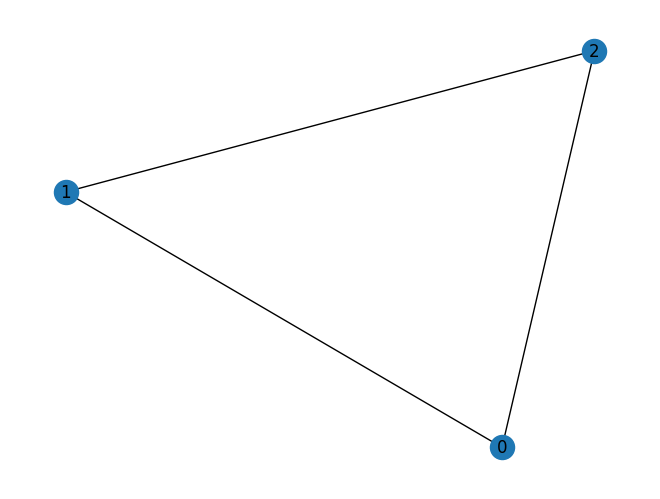

In [214]:
g = flower(1)
nx.draw(g, with_labels=True)

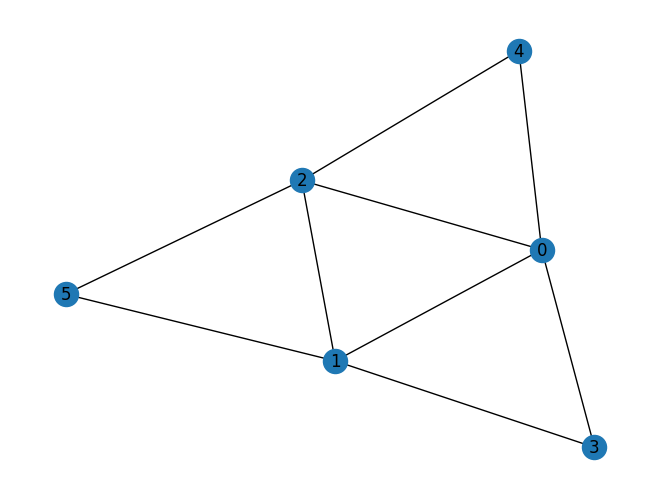

In [213]:
g1 = flower(2)
nx.draw(g1, with_labels=True)

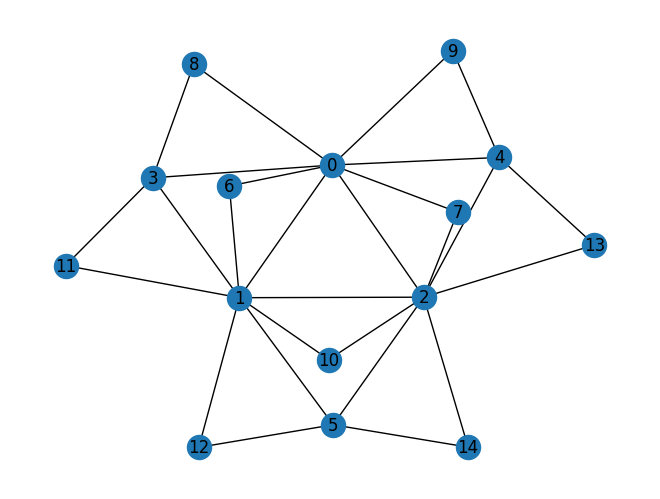

In [212]:
g2 = flower(3)
nx.draw(g2, with_labels=True)